# Homework 5: Sampling and Probability (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, February 9** at **11:59pm**. Late work will not be accepted unless it follows the specific policy of the instructor.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck. Submit your homework 60-30 minutes to ensure that it will upload before the deadline.

- Output <u>all</u> code for a question to receive full credit.

- Check the file preview on Gradescope to make sure all of your answers are visible. Files should NOT be too large to preview.

- **All functions must have a docstring. Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.**


In [3]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

## 1.  Earthquakes (10 points)

The next cell loads a table containing information about every earthquake above a magnitude of 4.5 in 2020 (prior to the time the file was downloaded on October 30, 2020), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [37]:
earthquakes = pd.read_csv('../data/earthquakes_2020.csv')[['time', 'mag', 'place']]
print(earthquakes.shape)
earthquakes.head(10)

(5402, 3)


,time,mag,place
0,2020-10-30T18:24:42.912Z,5.5,"50 km NNE of Oxapampa, Peru"
1,2020-10-30T18:01:44.159Z,5.0,"86 km WNW of Tari, Papua New Guinea"
2,2020-10-30T15:51:36.039Z,4.6,"37 km WSW of Ashkāsham, Afghanistan"
3,2020-10-30T15:14:56.384Z,5.2,"8 km NW of Kokkári, Greece"
4,2020-10-30T14:47:02.307Z,4.6,"80 km WSW of Kirakira, Solomon Islands"
5,2020-10-30T13:01:19.684Z,4.7,"193 km NNW of Sola, Vanuatu"
6,2020-10-30T13:00:43.723Z,4.9,"11 km NNW of Kokkári, Greece"
7,2020-10-30T11:51:27.563Z,7.0,"15 km NNE of Néon Karlovásion, Greece"
8,2020-10-30T11:10:09.904Z,5.6,"41 km E of Auki, Solomon Islands"
9,2020-10-30T10:14:58.937Z,5.3,south of the Fiji Islands


This dataset shows all of the earthquakes that occurred in 2020. There are a lot of earthquakes that occured that year that are of interest, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in that year to get an idea about the distribution of magnitudes throughout the year!

**Question 1. (2pts)** 

In the following lines of code, we take two different samples from the earthquake data frame, and calculate the mean of the magnitudes of these earthquakes. 

What specific type(s) of sampling methods was used? Are these samples representative of the population of earthquakes in the original table (that is, should we expect the mean to be close to the population mean)?   Justify your answer and state any assumptions you are making.

In [38]:
sample1 = earthquakes.sort_values(by=['mag'], ascending = False).head(100)
sample1_magnitude_mean = np.mean(sample1.mag)

sample2 = earthquakes.head(100)
sample2_magnitude_mean = np.mean(sample2.mag)
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.359, 4.912000000000001]

**Type your response in this cell:** *What type of sampling methods were used? (Look at options from lecture and Lab) Are these samples representative of the population of earthquakes in the original table?*


Answer: In sample1, earthquakes (the dataset) is sorted into a descended list of 'mag' values, in which sample1 is made up of the 100 earthquakes with the largest magnitudes. This would be an example of stratified sampling, in which a larger dataset is split into more value-specific strata. A Simple Random Sample (SRS).  is then implemented onto the specific strata, sample1. sample2 is also sampled through stratified sampling, although in a more subtle way. earthquakes (the dataset itself) is implicitly sorted by date, in descending order of occurance, so when you take the first 100 data points from 'earthquakes', you are implicitly creating a strata organized by date, which can also induce confounding factors (maybe some months of the year were worse for earthquakes than others). Although both sampling strategies could be improved on, I would say sample2 will be more representative of the population of earthquakes in the original dataset than sample 1.


**Question 2. (2pts)** 

Write code producing a random sample of size 500 that represents the population, then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. Refer to sampling methods for dataframes discussed in class.

In [39]:
representative_sample = earthquakes.sample(500, replace = False)
representative_mean = np.mean(representative_sample.mag)
representative_mean

4.7928999999999995

**Question 3. (3 pts)** 

Suppose we want to figure out the mean magnitude of the earthquakes in 2020, but we could only use a sample of 500 from our `earthquakes` data.

To determine whether using this sample size is a plausible idea, write code that simulates the mean of a random sample of size 500 from `earthquakes`, simulated 5000 times. Assign your array of averages to the variable `means`. Print the average value of `means`


In [40]:
means = np.array([])
num_experiments = 5000

for i in np.arange(num_experiments):
    sample_size = 500
    representative_sample = earthquakes.sample(sample_size, replace = False)
    means = np.append(means, np.mean(representative_sample.mag))

print(np.mean(means))

4.8041908079999995


**Question 4. (1 pt)**
Plot a histogram of the values in your `means` variable.


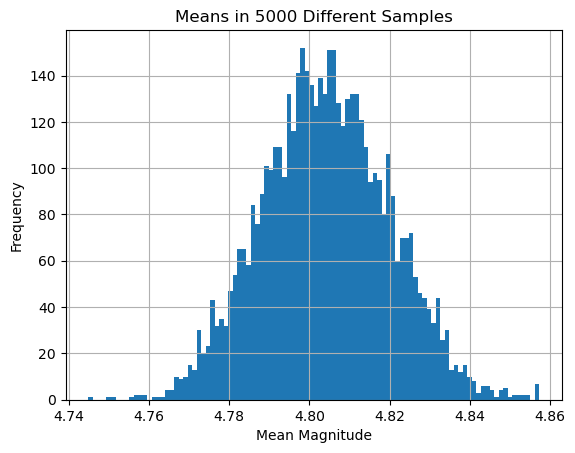

In [41]:
legend = "Means in " +str(num_experiments) + " Different Samples"
pd.DataFrame({legend: means}).hist(bins=100)

plt.ylabel("Frequency")
plt.xlabel("Mean Magnitude")

plt.show()

**Question 5. (1 pt)** 

Find the magnitude of the (actual) strongest earthquake this year to help you determine your answer.


In [42]:
strongest_earthquake = max(earthquakes.mag)
print(f"The strongest measured earthquake of 2020 had a magnitude of {strongest_earthquake}")

The strongest measured earthquake of 2020 had a magnitude of 7.8


**Question 6. (1 pt)** 

Based on your experiment above, is a single random sample of size 500 likely to help you determine the largest magnitude earthquake in the population?  Why or why not? 


**Type your response in this cell:**

The short answer is: to some extent. Although taking a random sample size of 500 from a dataset with 5402 values will probably not provide you with the exact value for largest magnitude earthquake in the population, taking the max() of your random sample will probably provide you with a value somewhat close to the actual maximum. Moreover, if you were to take a random sample of 500, 5000 times, record the maximum values in each random sample, and average all of your maximum values, you'd probably end up with a value even closer, yet not exactly equivalent, to your actual maximum magnitude.

## 2. Probability and Simulation (11pts)

**Question 7: (3pts)** Suppose you toss a coin 5 times in a row and record the total number of heads. How many elements are in the sample space? Write out the sample space. Does each outcome have the same probability? Why or why not?


The sample space would be the set of outcomes {HHHHH, HHHHT, HHHTT...TTTTH, TTTTT}, and it would have a total of 2^5 = 32 outcomes. Each outcome would not have the same probability, as the probability of each outcome in this case would depend on the number of heads in that outcome. Since there are 5 coin tosses, the number of heads can range from 0 to 5. The probability of getting a certain number of heads is determined by the number of ways that outcome can occur divided by the total number of possible outcomes (32 in this case).

**Question 8: (2pts)**  Calculate the probability of getting exactly 1 head. Justify your work. 

Out of the 32 possible outcomes, there are 5 outcomes in which we get exactly 1 head: {HTTTT, THTTT, TTHTT, TTTHT, TTTTH}. Therefore, the probability of geting exactly 1 head would be 5/32, which = 0.15625.

**Question 9: (5pts)** **Simulate this experiment and graph your results.** Simulate the above experiment of tossing a fair coin 5 times and recording the number of heads. You repeat this 10,000 times. Graph you resulting outcome with a histogram. (Make sure to label your resulting graph).

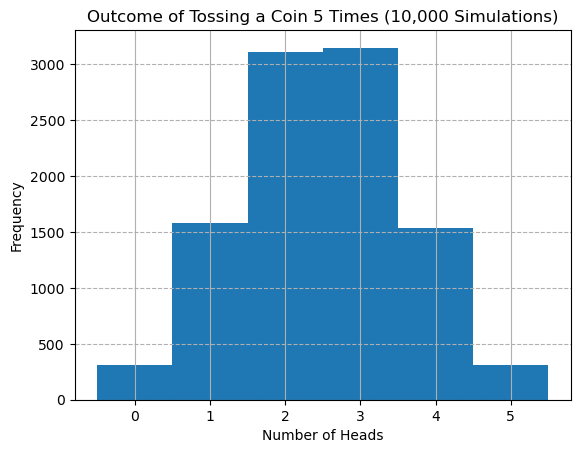

In [43]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

def simulate_tosses(n):
    '''Function to simulate tossing a fair coin n times and counting the number of heads'''
    return np.random.binomial(n, 0.5)

num_simulations = 10000
outcomes = np.empty(0)

for i in range(num_simulations):
    outcomes = np.append(outcomes, simulate_tosses(5))
    
ten_thousand_simulations = pd.DataFrame({'Outcomes': outcomes})
ten_thousand_simulations.Outcomes.hist(bins=np.arange(7)-0.5)

plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Outcome of Tossing a Coin 5 Times (10,000 Simulations)')
plt.xticks(np.arange(6))
plt.grid(axis='y', linestyle='--')
plt.show()

**Question 10: (1pt)** Based on your experiment above. What was the probability of getting exactly 1 heads? (Use your data to find the empirical probability of getting exactly 1 head).

In [44]:
probability_one_head = len(ten_thousand_simulations.loc[ten_thousand_simulations['Outcomes'] == 1])/10000
print(f"The probability of getting exactly one heads is {probability_one_head}")

The probability of getting exactly one heads is 0.1584


## 3. Probability on a DataFrame (8pts)

Now we will investigate probabilities and conditional probabilities on the Titanic data! It will be useful to write out what you want to compute before starting immediately with the code.

In [45]:
titanic = pd.read_csv("../data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Question 11: (2 pts)** Suppose we choose a passenger at random from the given dataset. What is the probability the passenger is from class 1 (Pclass=1)?

In [50]:
Pclass_1 = titanic.loc[titanic.Pclass == 1]
probability_Pclass_1 = Pclass_1.shape[0]/titanic.shape[0]
print(f"The probability we choose a passenger from class 1 is {probability_Pclass_1}")

The probability we choose a passenger from class 1 is 0.24242424242424243


Suppose we choose a passenger at random from the data... compute the following.

**Question 12: (2 pts)**  What is the probability they survive given they are female?

In [65]:
female_df = titanic.loc[titanic.Sex == 'female']
female_probability = female_df.shape[0]/titanic.shape[0]
female_survived_probability = female_df.loc[female_df.Survived == 1].shape[0]/female_df.shape[0]

survived_given_female_probability = female_probability/female_survived_probability

print(f"If we choose a passenger at random from the dataset, 'titanic', the probability they survived given they are female is {survived_given_female_probability}")

If we choose a passenger at random from the dataset, 'titanic', the probability they survived given they are female is 0.4749256995322804


**Question 13: (2 pts)** What is the probability they are in class 1 given they are in paid more than 30 units in Fare?

In [62]:
over_30_units = titanic.loc[titanic.Fare > 30]
over_30_units_probability = over_30_units.shape[0]/titanic.shape[0]
Pclass1_over_30_probability = over_30_units.loc[over_30_units.Pclass == 1].shape[0]/over_30_units.shape[0]

Pclass1_given_over_30_probability = over_30_units_probability/Pclass1_over_30_probability

print(f"If we choose a passenger at random from the dataset, 'titanic', the probability they are in class 1 given they paid more than 30 units in fair is {Pclass1_given_over_30_probability}")

If we choose a passenger at random from the dataset, 'titanic', the probability they are in class 1 given they paid more than 30 units in fair is 0.3636363636363637


**Question 14: (2pts)** What is the probability they survive given they are in class 1 and female?

In [61]:
female_Pclass1_df = titanic[(titanic.Sex == 'female') & (titanic.Pclass == 1)]
survived_given_female_class1_probability = female_Pclass1_df.loc[female_Pclass1_df.Survived == 1].shape[0] / female_Pclass1_df.shape[0]

print(f"If we choose a passenger at random from the dataset, 'titanic', the probability they survived given they are in class 1 and female is {survived_given_female_class1_probability}")

If we choose a passenger at random from the dataset, 'titanic', the probability they survived given they are in class 1 and female is 0.9680851063829787


## 4. Card Deck (21 points) ##

This problem is about simulating blackjack hands (rules explained below) with simple rules for when the player asks for more cards and when the player "stands" (i.e. doesn't ask for more cards).

Cards are drawn without replacement from a deck of 52 cards:

A photo of a standard deck of cards is shown for your reference:

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/English_pattern_playing_cards_deck.svg/1599px-English_pattern_playing_cards_deck.svg.png?20170224191528" width="75%"/>

    
    


The 52-card deck includes 13 ranks (card numbers or faces) of four suits: clubs (♣), diamonds (♦), hearts (♥) and spades (♠).

The numbered cards 2-10 have values 2-10, the cards Jack, Queen, and King have value 10, and the card 1, called Ace, can have the value 1 or the value 11, whichever is more advantageous to the player.

Blackjack is a card game played against the dealer where the object of the game is to have a hand with a total value higher than the dealer's without going over a score of 21.

For more information see:

https://en.wikipedia.org/wiki/Blackjack


**Question 15. (2 pts)**

Write a function that creates symbols in <u>string</u> format for each of the cards in a deck of cards. (The collection of symbols will be the "deck"--to keep track of what cards have been used and not-yet-used for sampling without replacement.)

Use this function to create a variable called `string_deck` that corresponds to each card in a standard deck. In other words, your variable should be a list of 52 items, where each item is a string that corresponds to the specific <u>rank</u> and <u>suit</u> of the card. Call for `string_deck` to display the result.

You will want to use these characters:  "♣","♦","♥","♠", to represent suits. You can copy and paste them from this question.

In [5]:
def create_string_deck(rank, suit):
    '''
    Create a string representation of a card based on its rank and suit
    
    Inputs:
        rank: The rank of the card, e.g., 'A', '2', ..., '10', 'J', 'Q', 'K'
        suit: The suit of the card, e.g., '♣', '♦', '♥', '♠'
        
    Returns:
        str: The string representation of the card
    '''
    
    return rank + suit

ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
suits = ['♣', '♦', '♥', '♠']

string_deck = []
for rank in ranks:
    for suit in suits:
        string_deck.append(create_string_deck(rank, suit))

string_deck

['A♣',
 'A♦',
 'A♥',
 'A♠',
 '2♣',
 '2♦',
 '2♥',
 '2♠',
 '3♣',
 '3♦',
 '3♥',
 '3♠',
 '4♣',
 '4♦',
 '4♥',
 '4♠',
 '5♣',
 '5♦',
 '5♥',
 '5♠',
 '6♣',
 '6♦',
 '6♥',
 '6♠',
 '7♣',
 '7♦',
 '7♥',
 '7♠',
 '8♣',
 '8♦',
 '8♥',
 '8♠',
 '9♣',
 '9♦',
 '9♥',
 '9♠',
 '10♣',
 '10♦',
 '10♥',
 '10♠',
 'J♣',
 'J♦',
 'J♥',
 'J♠',
 'Q♣',
 'Q♦',
 'Q♥',
 'Q♠',
 'K♣',
 'K♦',
 'K♥',
 'K♠']

**Question 16. (2 pts)**

Suppose you draw two cards (without replacement). What is the probability of both of the cards you draw being Queens? Show your work mathematically and print/call for your answer.

In [15]:
probability_first_queen = 4/52
probability_second_queen_given_first_queen = 3/51

probability_both_queens = probability_first_queen * probability_second_queen_given_first_queen

print("The probability of drawing two Queens is:", probability_both_queens)

The probability of drawing two Queens is: 0.004524886877828055


**Question 17. (3 pts)**

Create some code that simulates this scenario 10000 times. Use this to check your answer to Question 16. Print/call for the final probability.

In [18]:
def simulate_two_queens():
    '''Function to simulate drawing two cards without replacement and checking if they are both Queens'''
    drawn_cards = np.random.choice(string_deck, size=2, replace=False)
    
    return drawn_cards[0][0] == 'Q' and drawn_cards[1][0] == 'Q'

num_simulations = 10000
num_two_queens = 0

for i in range(num_simulations):
    num_two_queens += simulate_two_queens()
    
probability_simulation = num_two_queens/num_simulations

print("Simulated probability of drawing two Queens:", probability_simulation)

Simulated probability of drawing two Queens: 0.0042


**Question 18. (2 pt)**

Now, back to blackjack. If the first card you draw is a 10, what is the probability that a second card will bring your point total to 20? Note, in blackjack cards are drawn without replacement.

Show your work mathematically and print/call for your answer.

In [19]:
# Once you draw a 10 from the original deck, the deck total goes down to 51. Consequently, there are three
# tens left in the deck and 12 total face cards that could theoretically get you to a point total of 20 in
# one turn

probability_20_given_10 = (3/51) + (12/51)

print("The probability of getting a point total of 20 given the first card is 10 is:", probability_20_given_10)

The probability of getting a point total of 20 given the first card is 10 is: 0.29411764705882354


**Question 19. (5 pts)**

Write a function `points` that counts the point values for a hand of cards in blackjack.

Remember Ace's are assigned a value of 11 unless that would make the total score go over 21, in which case they are assigned a value of 1.

HINT: It might be useful to assume a value of 1 initially for Ace's, and adjust at the end.

In [20]:
#The following dictionary might be helpful, feel free to change this if you defined your deck differently
value = {"A":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"J":10,"Q":10,"K":10}
def points(cards):
    '''Counts the number of points a Blackjack hand holds.'''
    
    score = 0
    
    for card in cards:
        rank = card[:-1]
        if score < 11 and rank == 'A':
            score += 11
        else:
            score += value[rank]
    
    return score
    

In [21]:
# Here are a handful of test cases, which should all be True:
( points(['5♦']) == 5,
  points(['A♦', 'A♣', 'A♠', 'A♦']) == 14,
  points(['J♦', 'A♣'] ) == 21,
  points(['5♦', '4♦', 'A♣'] ) == 20,
  points(['K♦', 'Q♦', 'A♣'] ) == 21,
  points(['5♣', 'K♦']) == 15)
 

(True, True, True, True, True, True)

**Question 20.** (**5 pts**)

In blackjack, the dealer must draw until they get a hand worth at least 17 points.

Write a function `drawhand()` to draw a hand of blackjack, adding cards until the (most advantageous) total number of points is at least 17.  `drawhand` should return the point value of the hand and a list containing the cards in the hand.

Hint1: `return(arg1, arg2)` is the syntax used to return 2 things from a function

Hint2: For this question, a different type of "loop" called a while loop might be useful. Here are two examples:

In [22]:
x = 0
while x < 10: # while this condition is true...
    print(x) #...do what is indented
    x = x+1

0
1
2
3
4
5
6
7
8
9


In [23]:
index = 0    
my_list = [1,3,5,7,6,12]
while sum(my_list[0:index]) < 15:
    index = index + 1
    print(my_list[0:index])
    print('sum: ' + str(sum(my_list[0:index])) )

[1]
sum: 1
[1, 3]
sum: 4
[1, 3, 5]
sum: 9
[1, 3, 5, 7]
sum: 16


In [13]:
def drawhand():
    '''Draws a hand of blackjack, adding cards until the total points is at least 17'''
    
    value = {"A":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"J":10,"Q":10,"K":10}
    hand = []
    score = 0
    
    while score < 17:
        card = np.random.choice(string_deck)
        hand.append(card)
        rank = card[:-1]
        if rank == 'A':
            if score < 11:
                score += 11
            else:
                score += 1
        else:
            score += value[rank]
        
    return score, hand
            

**Question 21.  (2 pts)**

Using the function you wrote in Question 20, estimate the probability the dealer draws a hand that "busts", meaning the dealer's hand exceeds 21 points.

Hint: `var1, var2 = function(arg)` is the syntax used to define 2 variables using a function that returns 2 things

In [14]:
def estimate_bust_probability(num_simulations):
    '''Estimates the probability of the dealer busting by simulating multiple draws'''
    
    bust_count = 0
    for _ in range(num_simulations):
        score, _ = drawhand()
        if score > 21:
            bust_count += 1
            
    bust_probability = bust_count/num_simulations
    
    return bust_probability

bust_probability = estimate_bust_probability(10000)
print("Estimated probability of dealer busting:", bust_probability)
    

Estimated probability of dealer busting: 0.2976
